In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt
import json
import pandas as pd

In [2]:
with open('extract.json', 'r') as fp:
    data = json.load(fp)

In [3]:
records = {}

for nn, user in enumerate(data):
    # phone number
    celular =  user.get('celular', {})
    phone = celular.get('ddd', '00') + celular.get('numer', '00000000')
    records.setdefault('telefone', []).append(phone)
    
    # rendimento
    for key, value in user.get('rendimento', {}).items():
        records.setdefault(key, []).append(value)
        
    # endereço
    for key, value in user.get('endereco', {}).items():
        records.setdefault(key, []).append(value)
    
    # cliente
    for key, value in user.get('cliente', {}).items():
        records.setdefault(key.replace('nome', 'user'), []).append(value)
    
    # analise
    analise = user.get('analise') or {}
    for key in [u'valor_solicitado', u'decisao_credito', u'data_primeira_parcela', u'classificacao_risco', u'qtde_parcelas']:
        records.setdefault(key, []).append(analise.get(key))
    
    # contrato
    contrato = user.get('contrato') or {}
    for key in [u'status', u'max_dias_parcela_atraso']:
        records.setdefault(key, []).append(contrato.get(key))
    
    # proposta
    proposta = user.get('proposta') or {}
    for key in [u'valor_solicitado', u'data_primeira_parcela', u'valor_contrato', u'analise_taxa_juros_mensal', u'qtde_parcelas']:
        records.setdefault('proposta_'+key, []).append(contrato.get(key))

In [4]:
df = pd.DataFrame.from_records(records)
df['renda'] = df['valor']

In [24]:
print "Espaço de features", df.shape

Espaço de features (100, 39)


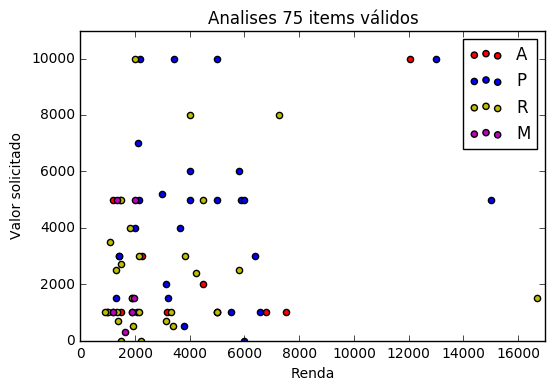

In [23]:
colors = ['r', 'b', 'y', 'm']
valids = df.decisao_credito.notnull()
classes = dict(zip(set(df[df.decisao_credito.notnull()].decisao_credito), colors))

for idx, (classe, color) in enumerate(classes.items()):
    plt.scatter(df[valids & (df.decisao_credito == classe)].renda, 
                df[valids & (df.decisao_credito == classe)].valor_solicitado, 
                c=color)

plt.title(u"Analises {} items válidos".format(len(df[valids])))
plt.xlabel('Renda')
plt.ylabel('Valor solicitado')
plt.xlim([0, 17000])
plt.ylim([0, 11000])
plt.legend(classes)
plt.show()